In [43]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.datasets import fetch_lfw_people
from sklearn.datasets import fetch_lfw_pairs

Use sklearn.datasets to import fetch_lfw_people

Include these in a DataFrame, set min_faces_per_person to 60, we need classes that are represented by enough observations.

The object you have imported contains several different objects, one of them is called DESCR, print it and read it, it will inform you on the data you are working with. If you're stuck, have a look at the documentation 😉

In [14]:
lfw_people = fetch_lfw_people(min_faces_per_person=60)
lfw_people

{'data': array([[0.53464055, 0.5254902 , 0.49673203, ..., 0.00653595, 0.00653595,
         0.00261438],
        [0.28627452, 0.20784314, 0.2522876 , ..., 0.96993464, 0.9490196 ,
         0.9346406 ],
        [0.31895426, 0.39215687, 0.275817  , ..., 0.4261438 , 0.7908497 ,
         0.9555555 ],
        ...,
        [0.11633987, 0.11111111, 0.10196079, ..., 0.5686274 , 0.5803922 ,
         0.5542484 ],
        [0.19346406, 0.21176471, 0.2901961 , ..., 0.6862745 , 0.654902  ,
         0.5908497 ],
        [0.12287582, 0.09803922, 0.10980392, ..., 0.12941177, 0.1633987 ,
         0.29150328]], dtype=float32),
 'images': array([[[0.53464055, 0.5254902 , 0.49673203, ..., 0.2653595 ,
          0.2653595 , 0.26013073],
         [0.56993467, 0.545098  , 0.4797386 , ..., 0.26143792,
          0.2627451 , 0.26013073],
         [0.5882353 , 0.5398693 , 0.47712418, ..., 0.2653595 ,
          0.26013073, 0.25751635],
         ...,
         [0.59869283, 0.7176471 , 0.4013072 , ..., 0.00522876,
     

In [16]:
print(lfw_people.DESCR)

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenCV li

In [17]:
lfw_people.data.shape

(1348, 2914)

In [23]:
lfw_people.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

What are the different categories in the variable target_names

In [25]:
lfw_people['target_names']

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi',
       'Tony Blair'], dtype='<U17')

In [26]:
print(lfw_people.target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


What is the shape of the variable images

In [29]:
lfw_people.images.shape

(1348, 62, 47)

---> This is a three dimensional array , the first dimension represents the numberof images, the second and third respectively represent the width and height of the images in the dataset.

In plotly express, you will find an imshow() method which lets you visualize images. Try and visualise an image in your dataset. Try adding the associated label as xlabel.

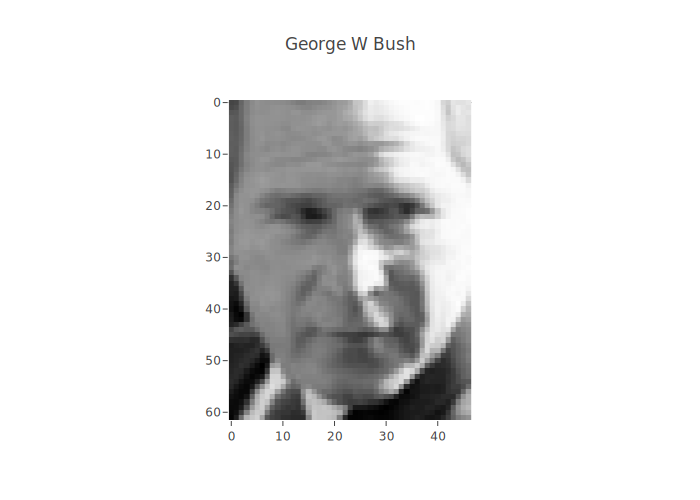

In [32]:
fig = px.imshow(lfw_people.images[7], title = lfw_people.target_names[lfw_people.target[7]], binary_string=True)
fig.show()

The code below will display the 15 first images of the dataset. It's a bit tricky but you can try to understand how it works 🤓

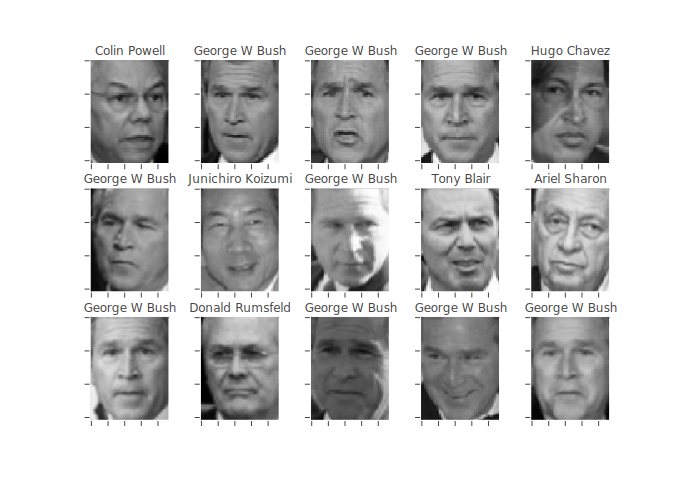

In [33]:
# Créer une figure pour afficher les 15 premières images
fig = px.imshow(lfw_people.images[:15], facet_col=0, facet_col_wrap=5, binary_string=True)

# Supprimer les étiquettes des axes
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=False)

# Créer un dictionnaire pour mapper les annotations aux noms des cibles
item_map = {str(i): lfw_people.target_names[target] for i, target in enumerate(lfw_people.target[:15])}

# Mettre à jour les annotations avec les noms de cibles
fig.for_each_annotation(lambda a: a.update(text=item_map.get(a.text.split("=")[1], a.text)))

# Afficher la figure
fig.show()

Declare an instance of the SVC class from sklearn.svm. Make sure the kernel is a radial basis function, and set the class_weight argument ton "balanced".

In [34]:
svm = SVC(kernel='rbf', class_weight='balanced')

Split your data between a train and a test set. If some preprocessing is necessary, apply it to the train and test sets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(lfw_people.data, lfw_people.target, test_size= 0.3, random_state= 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Fit your model on your training data. What is the generalized accuracy of the model?

In [38]:
svm.fit(X_train, y_train)

SVC(class_weight='balanced')

In [42]:
svm.score(X_test, y_test)

0.7506172839506173

Let's attempt to improve the score by finding the best set of hyper-parameters for this model. Use GridSearchCV to do so.

In [45]:
# Grid of values to be tested
params = {
    'C': [1, 5, 10, 59],
    'gamma': [0.0001, 0.0005, 0.001, 0.005]
}

gridsearch = GridSearchCV(svm, param_grid = params, verbose=2, n_jobs=-1)
gridsearch

GridSearchCV(estimator=SVC(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [1, 5, 10, 59],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             verbose=2)

In [46]:
gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ..................................C=1, gamma=0.0001; total time=   3.3s
[CV] END ..................................C=1, gamma=0.0001; total time=   3.6s
[CV] END ..................................C=1, gamma=0.0001; total time=   3.7s
[CV] END ..................................C=1, gamma=0.0001; total time=   3.7s
[CV] END ..................................C=1, gamma=0.0001; total time=   3.7s
[CV] END ..................................C=1, gamma=0.0005; total time=   3.6s
[CV] END ..................................C=1, gamma=0.0005; total time=   3.9s
[CV] END ..................................C=1, gamma=0.0005; total time=   3.9s
[CV] END ..................................C=1, gamma=0.0005; total time=   3.7s
[CV] END ..................................C=1, gamma=0.0005; total time=   3.8s
[CV] END ...................................C=1, gamma=0.001; total time=   4.2s
[CV] END ...................................C=1,

GridSearchCV(estimator=SVC(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [1, 5, 10, 59],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             verbose=2)

In [47]:
print("Best hyperparameters: ", gridsearch.best_params_)

Best hyperparameters:  {'C': 10, 'gamma': 0.0001}


In [49]:
print("Best score on test set: ", gridsearch.score(X_test, y_test))

Best score on test set:  0.8197530864197531


Analyze the model's confusion matrix, then use the classification_report function

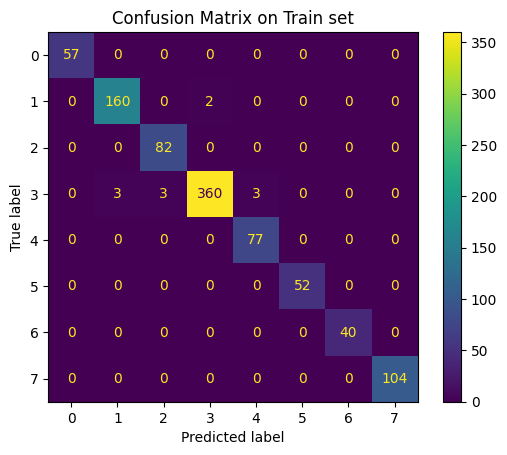

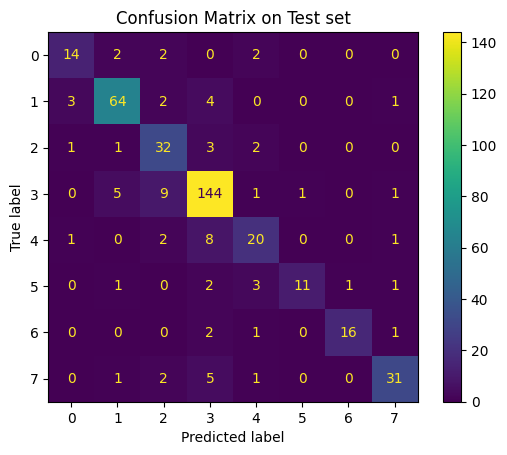

In [50]:
# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gridsearch, X_train, y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gridsearch, X_test, y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

In [51]:
Y_test_pred = gridsearch.predict(X_test)
print(classification_report(y_test,Y_test_pred, target_names= lfw_people.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.74      0.70      0.72        20
     Colin Powell       0.86      0.86      0.86        74
  Donald Rumsfeld       0.65      0.82      0.73        39
    George W Bush       0.86      0.89      0.88       161
Gerhard Schroeder       0.67      0.62      0.65        32
      Hugo Chavez       0.92      0.58      0.71        19
Junichiro Koizumi       0.94      0.80      0.86        20
       Tony Blair       0.86      0.78      0.82        40

         accuracy                           0.82       405
        macro avg       0.81      0.76      0.78       405
     weighted avg       0.83      0.82      0.82       405



Let's try looking at a few images and the predictions the model makes on them. Like we did at the beginning of the exercise, the code below displays a collection of images with the corresponding predictions.

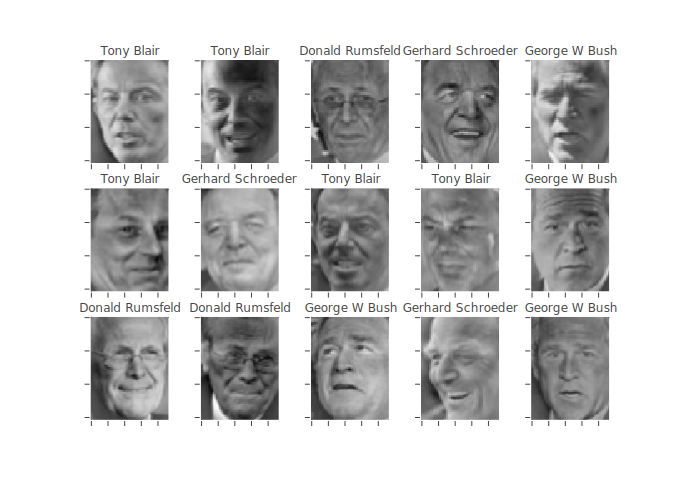

In [52]:
images = np.array([X.reshape(62,47) for X in X_test[0:15]])

fig = px.imshow(images, facet_col=0, facet_col_wrap = 5, binary_string=True)
fig.update_xaxes(showticklabels=False).update_yaxes(showticklabels=False)
item_map={f'{i}':key for i, key in enumerate(lfw_people.target_names[y_test[0:15]])}
fig.for_each_annotation(lambda a: a.update(text=item_map[a.text.split("=")[1]]))